In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import preprocessing

df = pd.read_csv("master.csv")

In [2]:
del df['age']
del df['suicides_no']
del df['country-year']
del df['HDI for year']
del df['generation']
del df['population']
del df['sex']
del df['country']
del df['year']
del df[' gdp_for_year ($) ']

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(n = 10000, replace = True)

In [4]:
gdp = df.loc[:, 'gdp_per_capita ($)']
suicides = df.loc[:, 'suicides/100k pop']

from sklearn import preprocessing
x = preprocessing.scale(gdp)
x = x.reshape(-1,1)
y = preprocessing.scale(suicides)
y = y.reshape(-1,1)
x_normalized = preprocessing.normalize(x, norm='l2')
y_normalized = preprocessing.normalize(y, norm='l2')
y = y.reshape(-1)
x = x.reshape(-1)

df['gdp_per_capita ($)'] = x
df['suicides/100k pop'] = y

In [5]:
df.corr()

,suicides/100k pop,gdp_per_capita ($)
suicides/100k pop,1.000000,0.010879
gdp_per_capita ($),0.010879,1.000000


<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

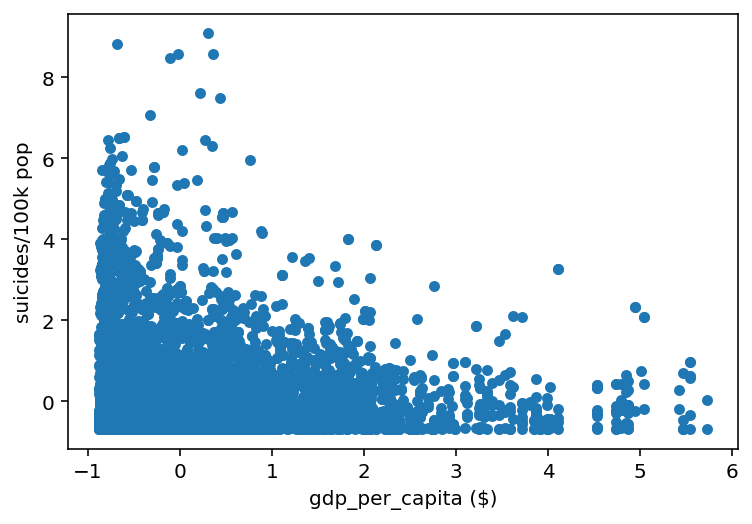

In [6]:
df.plot(kind='scatter',x='gdp_per_capita ($)',y='suicides/100k pop')

In [7]:
X = df.iloc[:, -1:].values
Y = df.iloc[:, 0].values

print(X)
print(Y)

[[-0.68491446]
 [-0.32773937]
 [ 0.67668123]
 ...
 [ 0.6162346 ]
 [ 0.66939408]
 [ 4.74039325]]
[ 3.98242173 -0.18402068 -0.67778159 ...  0.2513672  -0.34093168
 -0.51658632]


In [8]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

model=regressor.fit(X_Train, y_Train) # FITTING MEANS TRAINING

# Predicting the Test set result ￼

Y_Pred = model.predict(X_Test)

In [9]:
print(model.coef_)
print(model.intercept_)

[0.0135681]
-0.004509811121116519


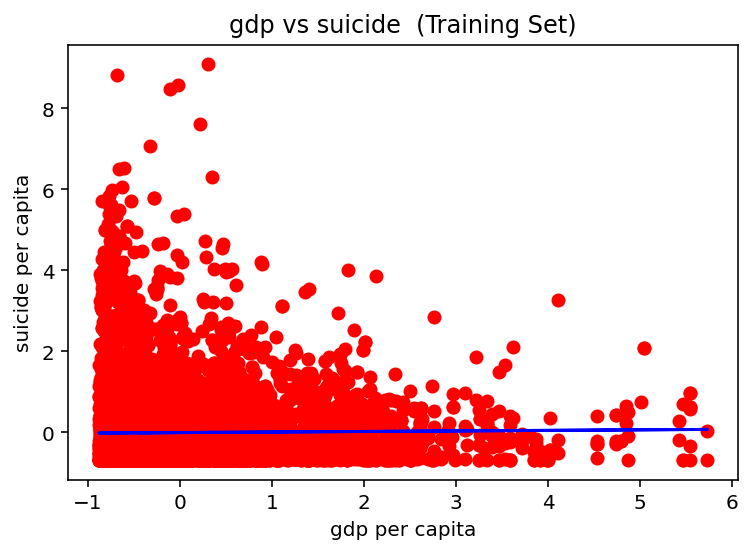

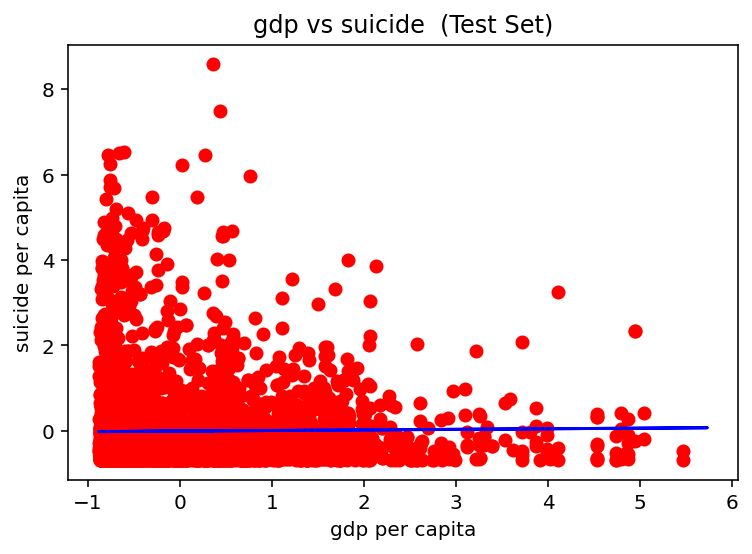

In [10]:
# Visualising the Training set results

plt.scatter(X_Train, y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('gdp vs suicide  (Training Set)')
plt.xlabel('gdp per capita')
plt.ylabel('suicide per capita')
plt.show()

# Visualising the Test set results

plt.scatter(X_Test, y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('gdp vs suicide  (Test Set)')
plt.xlabel('gdp per capita')
plt.ylabel('suicide per capita')
plt.show()

In [11]:
model.score(X, Y)

9.077341773477965e-05

In [12]:
df.describe()

,suicides/100k pop,gdp_per_capita ($)
count,1.000000e+04,1.000000e+04
mean,1.665890e-16,1.214140e-16
std,1.000050e+00,1.000050e+00
min,-6.777816e-01,-8.798850e-01
25%,-6.274415e-01,-7.089778e-01
50%,-3.559266e-01,-3.961023e-01
75%,1.978140e-01,4.194816e-01
max,9.086046e+00,5.731026e+00


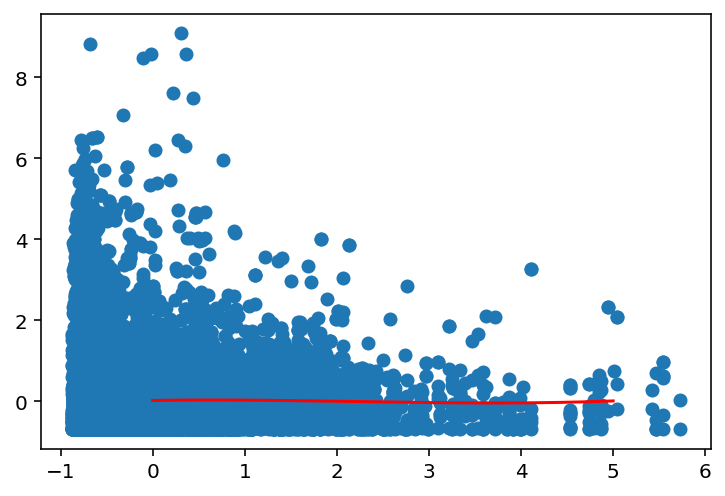

In [13]:
import numpy

x = df['gdp_per_capita ($)']
y = df['suicides/100k pop']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0,5,225)

plt.scatter(x,y)
plt.plot(myline, mymodel(myline), color='red')
plt.show()

In [14]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x)))

0.0005611766963189435


In [15]:
mymodel

poly1d([ 0.00504859, -0.03285683,  0.03571787,  0.02307232])